In [1]:
### This is a gene specific analysis notebook
from candidate_utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Gene-transcript dict
dict_name = pickle.load(open(os.path.join(dir_refs,'dict_name_forcov_062121.pkl'), 'rb'))

In [4]:
gene_name = 'PTH'

In [5]:
# Find transcript for the gene
for transcript,gene in dict_name.items():
    if gene == gene_name:
        print(transcript)

ENST00000529816


<span style="color:blue">**The histology subtypes of patients with the mutation**</span>.


In [6]:
def get_num_str(gene, histology):
    global df_syn, dir_maf
    df_maf = pd.read_csv(os.path.join(dir_maf,feature_type, histology+'.csv'), sep = '\t')
    df_maf = df_maf.set_index(['Hugo_Symbol','Variant_Classification','Donor_ID' ])
    df_gene_mut = df_maf.loc[pd.IndexSlice[gene, 'Silent',:],:]### All patients' specific histology in this histology type
    ldonor = df_gene_mut.index.get_level_values('Donor_ID').unique().tolist()
    
    df_histology = df_info[df_info['histology_abbreviation'] == histology]
    df_histology_syn = df_histology[df_histology['icgc_donor_id'].isin(ldonor)]

    ### The tumor patient mutation information for synonymous patients and all patients
    df_num_summ = pd.concat([pd.concat({'syn': df_histology_syn[num_cols].describe()}, names=['mut_status'])\
    ,pd.concat({'all': df_histology[num_cols].describe()}, names=['mut_status'])])

    ### The tumor histology subtype information
    df_str_info = pd.DataFrame(columns = str_cols, index = ['syn', 'all'])
    for columns in str_cols:
        if columns not in ['icgc_donor_id','histology_abbreviation','histology_tier2']:
            df_str_info.loc['all', columns] = str(dict(Counter(df_histology[columns].tolist())))
            df_str_info.loc['syn', columns] = str(dict(Counter(df_histology_syn[columns].tolist())))
    return df_str_info, df_num_summ

df_str, df_num = get_num_str(gene_name,'Ovary-AdenoCA')

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
df_str

,dcc_specimen_type,histology_tier3,histology_tier4,tumour_histological_type,tumour_stage,tumour_histological_comment,specimen_donor_treatment_type
syn,{'Primary tumour - solid tissue': 2},{'Adenocarcinoma': 2},{'Serous cystadenocarcinoma': 2},"{'Serous cystadenocarcinoma, NOS': 2}","{nan: 1, 'III': 1}",{nan: 2},"{nan: 1, 'no treatment': 1}"
all,"{'Recurrent tumour - other': 9, 'Primary tumou...",{'Adenocarcinoma': 110},"{'Adenocarcinoma': 10, 'Serous cystadenocarcin...","{'Adenocarcinoma, NOS': 10, 'Serous cystadenoc...","{nan: 50, 'III': 54, 'IV': 6}",{nan: 110},"{'other therapy': 15, 'no treatment': 51, nan:..."


In [8]:
df_num

SV.events  Coding.SNVs  Non.coding.SNVs  \
mut_status                                                   
syn        count    2.000000     2.000000         2.000000   
           mean   159.500000    56.000000      5528.500000   
           std     19.091883    12.727922       444.770165   
           min    146.000000    47.000000      5214.000000   
           25%    152.750000    51.500000      5371.250000   
           50%    159.500000    56.000000      5528.500000   
           75%    166.250000    60.500000      5685.750000   
           max    173.000000    65.000000      5843.000000   
all        count  109.000000   110.000000       110.000000   
           mean   263.862385    87.254545      8690.454545   
           std    162.874780    50.933206      5005.263513   
           min     24.000000    20.000000      1919.000000   
           25%    161.000000    55.000000      5663.000000   
           50%    235.000000    74.500000      7136.000000   
           75%    323.000000   108.250000     10386.500000   
           max    790.000000   386.000000     40238.000000   

                  CNA.events..do_not_use.  Retrotransposon.insertions  \
mut_status                                                              
syn        count                 2.000000                    2.000000   
           mean                438.000000                   14.000000   
           std                  38.183766                   16.970563   
           min                 411.000000                    2.000000   
           25%                 424.500000                    8.000000   
           50%                 438.000000                   14.000000   
           75%                 451.500000                   20.000000   
           max                 465.000000                   26.000000   
all        count               110.000000                  110.000000   
           mean                638.527273                    7.127273   
           std                 335.796976                   11.573546   
           min                 138.000000                    0.000000   
           25%                 424.250000                    0.000000   
           50%                 558.500000                    3.000000   
           75%                 745.500000                    8.000000   
           max                1758.000000                   60.000000   

                  Mitochondrial.mutations    all.Indels  
mut_status                                               
syn        count                 2.000000      2.000000  
           mean                  3.000000    399.000000  
           std                   2.828427      2.828427  
           min                   1.000000    397.000000  
           25%                   2.000000    398.000000  
           50%                   3.000000    399.000000  
           75%                   4.000000    400.000000  
           max                   5.000000    401.000000  
all        count               110.000000    110.000000  
           mean                  3.918182    798.363636  
           std                   2.756583   1972.841032  
           min                   0.000000    110.000000  
           25%                   2.000000    372.250000  
           50%                   3.000000    527.000000  
           75%                   5.000000    756.500000  
           max                  14.000000  20910.000000

<span style="color:blue">**Mutation**</span>.


In [9]:
def get_mut(gene, histology):
    global df_syn
    df_maf = pd.read_csv(os.path.join(dir_maf,feature_type, histology+'.csv'), sep = '\t')
    df_maf = df_maf.set_index(['Hugo_Symbol','Variant_Classification','Donor_ID' ])
    ldonor_all = df_maf.index.get_level_values('Donor_ID').unique().tolist()
    print(f'Total {len(ldonor_all)} patients')
    df_gene_mut = df_maf.loc[pd.IndexSlice[gene, 'Silent',:],:]### All patients' specific histology in this histology type
    ldonor = df_gene_mut.index.get_level_values('Donor_ID').unique().tolist()
    print(f'{len(ldonor)} patients have synonymous mutations, they are: {ldonor}')
    for muts in df_gene_mut['Genome_Change'].tolist():
        chromosome = muts.split(':')[0].split('.')[-1].split('chr')[-1]
        change = muts.split(':')[1]
        mutation = chromosome+':g.'+change
        print(mutation)

    return df_maf, df_gene_mut, ldonor
df_all, df_mut, donor_list = get_mut(gene_name, 'Ovary-AdenoCA')

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Total 109 patients
2 patients have synonymous mutations, they are: ['DO28273', 'DO46362']
11:g.13513970A>G
11:g.13514331A>G


In [10]:
df_all.loc[pd.IndexSlice[gene_name, :,donor_list],'Genome_Change']

Hugo_Symbol  Variant_Classification  Donor_ID
PTH          Silent                  DO28273     g.chr11:13513970A>G
                                     DO46362     g.chr11:13514331A>G
Name: Genome_Change, dtype: object

<span style="color:blue">**CNV**</span>.


In [11]:
cnv = get_cnv(donor_list, gene_name)

                               8658f4f5-9a50-4195-8ea3-227951977647
Gene Symbol Locus ID Cytoband                                      
PTH         5741     11p15.2                                    2.0
                               cd9efdef-a7fb-49e5-9515-63606ae8bbfc
Gene Symbol Locus ID Cytoband                                      
PTH         5741     11p15.2                                    3.0


<span style="color:blue">**Expression PCAWG**</span>.


Number of normal patient: 0
Number of synonymous patients: 2
Number of other tumor patients:110
test statistic:71.0,p-value:0.1599


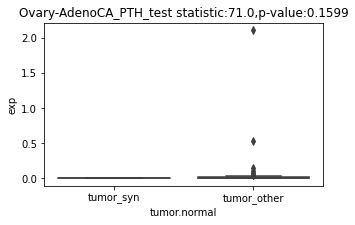

In [15]:
def get_gene_exp(gene_name, df_expression):
    global df_nsig
    gene_id = 'ENSG00000152266'
    df = df_expression.loc[df_expression.index.str.contains(rf'{gene_id}'),:]
    return df

def get_syn_mut(gene_name):
    global df_syn
    histology = 'Ovary-AdenoCA'
    df_maf = pd.read_csv(os.path.join(dir_maf,feature_type, histology+'.csv'), sep = '\t')
    df_maf = df_maf.set_index(['Hugo_Symbol','Variant_Classification','Donor_ID' ])
    df_silent = df_maf.loc[pd.IndexSlice[gene_name, 'Silent',:],:]
    patient = df_silent.index.get_level_values('Donor_ID').unique().tolist()
    
    return df_silent, patient

def get_patient_id(gene_name, patients):
    global df_exp_info, df_syn
    histology = 'Ovary-AdenoCA'
    df = df_exp_info[df_exp_info['histology_abbreviation'] == histology]
    
    # Get tumor, syn and normal patient aliquot id
    normal_id = df[df['tumor.normal'] == 'normal']['aliquot_id']
    df_tumor = df[df['tumor.normal'] == 'tumor']
    tumor_syn_id = df_tumor[df_tumor['icgc_donor_id'].isin(patients)]['aliquot_id']
    tumor_other_id = df_tumor[~df_tumor['icgc_donor_id'].isin(patients)]['aliquot_id']
    
    return normal_id, tumor_syn_id, tumor_other_id


def get_expression(gene):
    histology = 'Ovary-AdenoCA'

    df_exp_gene = get_gene_exp(gene, df_exp)
    df_synmut, synp = get_syn_mut(gene)
    id_normal, id_syn, id_other =get_patient_id(gene, synp)

    df_normal, normal_test = get_patient_exp(id_normal, df_exp_gene, 'normal')
    df_tsyn, syn_test = get_patient_exp(id_syn, df_exp_gene,'tumor_syn')
    df_tother, other_test = get_patient_exp(id_other, df_exp_gene, 'tumor_other')
    df_all = pd.concat([df_normal,df_tsyn,df_tother])

    nnorm = len(df_normal['id'].unique())
    print(f'Number of normal patient: {nnorm}')
    nsyn = len(df_tsyn['id'].unique())
    print(f'Number of synonymous patients: {nsyn}')
    nother = len(df_tother['id'].unique())
    print(f'Number of other tumor patients:{nother}')

    fig,ax = plt.subplots(figsize=(5,3))
    ax = sns.boxplot(x = 'tumor.normal', y = 'exp', data = df_all)

    mannwhitneyu(syn_test, other_test)
    text = f'test statistic:{round(mannwhitneyu(syn_test, other_test)[0],4)},p-value:{round(mannwhitneyu(syn_test, other_test)[1],4)}'
    print(text)
    ax.set_title(histology+'_'+gene+'_'+text)
    # plt.savefig('./res/'+organ_type+'_'+gene_name+'.png')
    plt.show()
get_expression(gene_name)

<span style="color:blue">**CRISPR**</span>.


In [16]:
get_lineage(gene_name, 'Ovary')

['Ovary Adenocarcinoma' 'Mixed Germ Cell' 'Ovary Carcinoma' 'SCCOHT'
 'Brenner Tumor']


51 in histology subtype
938 not in histology subtype
test statistic:20727.0,    p-value:0.0541
test statistic:23454.0,    p-value:0.3348


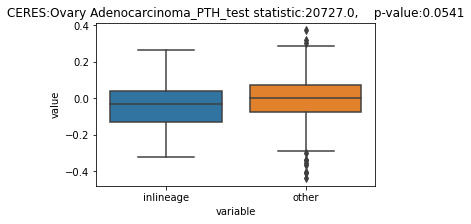

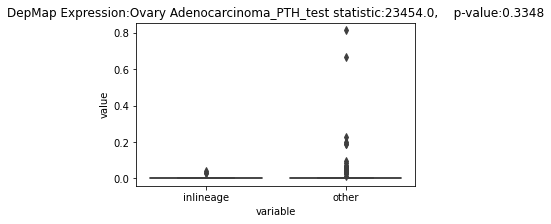

In [17]:
# def get_CERES(gene, lineage):
#     dir_depmap = './depmap'
#     df_depmap = pd.read_csv(os.path.join(dir_depmap, gene+'_21Q2.csv'))
#     df_depmap.columns = ['ID', 'CERES', 'Name', 'Primary Disease', 'Lineage', 'Lineage Subtype', 'Mutation']

#     df_gene = df_depmap[df_depmap['Lineage Subtype'] == lineage]
#     print(f'{len(df_gene)} in histology subtype')
#     df_other = df_depmap[df_depmap['Lineage Subtype'] != lineage]
#     print(f'{len(df_other)} not in histology subtype')
#     df_all = pd.DataFrame({'inlineage':df_gene['CERES'],
#                           'other':df_other['CERES']})
#     df_all = df_all.melt()

#     fig,ax = plt.subplots(figsize=(5,3))
#     ax = sns.boxplot(x = 'variable', y = 'value', data = df_all)

#     mannwhitneyu(df_gene['CERES'], df_other['CERES'])
#     text = f'test statistic:{round(mannwhitneyu(df_gene["CERES"], df_other["CERES"])[0],4)},\
#     p-value:{round(mannwhitneyu(df_gene["CERES"], df_other["CERES"])[1],4)}'
#     print(text)
#     ax.set_title('CERES:'+lineage+'_'+gene+'_'+text)
    
#     # Expression
#     df_all_exp = pd.DataFrame({'inlineage':df_gene['Expression'],
#                       'other':df_other['Expression']})
#     df_all_exp = df_all_exp.melt()
#     fig,ax = plt.subplots(figsize=(5,3))
#     ax = sns.boxplot(x = 'variable', y = 'value', data = df_all_exp)

#     mannwhitneyu(df_gene['Expression'], df_other['Expression'])
#     text = f'test statistic:{round(mannwhitneyu(df_gene["Expression"], df_other["Expression"])[0],4)},\
#     p-value:{round(mannwhitneyu(df_gene["Expression"], df_other["Expression"])[1],4)}'
#     print(text)
#     ax.set_title('DepMap Expression:'+lineage+'_'+gene+'_'+text)
get_CERES(gene_name, 'Ovary Adenocarcinoma')

<span style="color:blue">**Alternative Splicing**</span>  

In [18]:
dir_splice = '../../anno_ref/ICGC/alternative_splicing'
exp_dir = '../../anno_ref/ICGC/pcawg_rnaseq/'
# Read aliquot id information
df_exp_info = pd.read_csv(os.path.join(exp_dir,'rnaseq.metadata.tsv'), sep = '\t')

In [27]:
### If patient is in the splicing file(transcriptome analysis info)
list_id = []
for donor in donor_list:
    tumor_id = df_exp_info[df_exp_info['icgc_donor_id'] == donor]['aliquot_id']
    if len(tumor_id) ==0:
        print(f'{donor} is not in PCAWG transcriptome analysis')
    else:
        list_id.append(tumor_id.tolist()[0])

In [41]:
df = pd.read_csv(os.path.join(dir_splice, '3prime.txt'), sep = '\t', index_col = 0)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [42]:
df

,event_type,event_chr,event_coordinates,alt_region_coordinates,gene_name,df814665-e6f0-4bf4-9d1b-5d4d2b529b33,d64a2073-6e4a-4893-8c3a-c3b6e2661e36,8e25f2da-e738-4a69-a679-ca279573440d,a443d193-64e2-42ac-8f9c-ac9f152c3d5a,c8e5ec9f-8126-404c-a5f6-437e7a99c4fa,...,20675a45-3e6c-4bf4-b1fc-21f36631a5e8,f05dba68-a8a6-4770-9e4d-62d3a9d70a79,77652635-dabc-4c06-92e6-b795b0b593ce,cc6baf87-b93e-4648-9584-262daa8bcc21,2c0fcb6f-6a39-4366-b226-b39a994b94de,0ce4a372-c91b-43e5-96e5-f42751699a50,77968712-a6c4-4db4-83ec-d686a71b13fa,38c3b55f-15e5-4074-8358-b4ca85a5a7fe,953ffa20-1de2-45f2-b5ba-7b0f672ee7fb,74786896-f6a8-48bf-9ae0-1d1fe2c8a15f
event_id,,,,,,,,,,,,,,,,,,,,,
alt_3prime_4,A3,1,11868:12227:12612:12697:12594:12697,12594:12612,ENSG00000223972.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alt_3prime_5,A3,1,11868:12227:12645:12697:12594:12697,12594:12645,ENSG00000223972.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alt_3prime_6,A3,1,11868:12227:12645:12697:12612:12697,12612:12645,ENSG00000223972.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alt_3prime_7,A3,1,12612:12697:13402:13655:13220:13655,13220:13402,ENSG00000223972.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alt_3prime_8,A3,1,12612:12697:13482:13670:13220:13670,13220:13482,ENSG00000223972.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
alt_3prime_3351078,A3,Y,25289157:25289229:25286772:25286819:25286772:2...,25286819:25286844,ENSG00000188120.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047619,NaN,NaN
alt_3prime_3351079,A3,Y,25298943:25299015:25289157:25289196:25289157:2...,25289196:25289229,ENSG00000188120.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alt_3prime_3351082,A3,Y,25316510:25316657:25316144:25316236:25316144:2...,25316236:25316249,ENSG00000188120.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
lidx = [i.split('.')[0] for i in df['gene_name'].unique().tolist()]

In [45]:
'ENSG00000152266' in lidx

False

In [37]:
df.loc[df.index.str.contains('ENSG00000152266'),list_id]

,65cc3a15-cfa9-48fb-b9e4-801398b073b8,df2d703d-bf00-41b2-8ce0-48a0c7dafdac
gene_id,,
